# 假设检验

把公认成立的结论作为$H_0$,把想要验证的结论作为$H_1$；目的是排除随机涨落的影响，证明颠覆性的结论、、


**表达式的具体形式不重要，不管分子分母，重要的是表达式本身服从的分布和置信区间怎么取**


**一般的流程：** 假设真理→计算真理条件下容许出错的样本空间→落在这个之外的就拒绝

![](https://philfan-pic.oss-cn-beijing.aliyuncs.com/img/db14861d8d378615a4c3c58ed7cb59ef.jpg)


## 检验错误
![](https://philfan-pic.oss-cn-beijing.aliyuncs.com/img/63b4282175bc38d9c62c10974c890f3b.jpg)

![](https://pic1.zhimg.com/v2-03d8728c2bfd660810f77033acc62ba4_1440w.jpg)
||拒绝假设|接受假设|
|---|---|---|
|$H_1$正确|$1-\beta$|Type Ⅱ error $\beta$|
|$H_0$正确|Type Ⅰ error $\alpha$| $1-\alpha$|

- 一类错误和二类错误无法同时变小
- 通常要求一类错误的概率小

放在机器学习领域：

真实情况\预测情况 | 正例 ｜ 反例
正例 TP FN
反例 FP TN

Type I Error 误报
Type II Error 漏报

- 当没有火警时，火警会响起（Type 1）；发生火灾时，火警警报无法响起（Type 2）
- 医生说男人怀孕了（Type 1）；医生说孕妇没有怀孕（Type 2）




不要老关注平均值，误差才是重要的

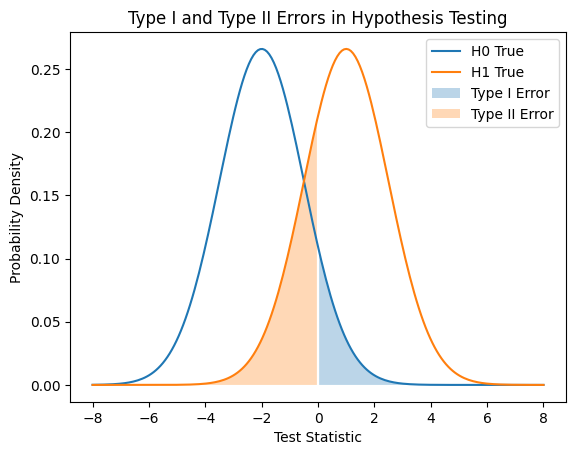

In [8]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

x=np.linspace(-8,8,200)
pdfa=st.norm.pdf(x,-2,1.5)
pdfb=st.norm.pdf(x,1,1.5)
plt.plot(x,pdfa,x,pdfb)
### 一类错误, 功效函数beta
plt.fill_between(x,pdfa,where=x>=0,alpha=0.3)
### 二类错误, 1-beta
plt.fill_between(x,pdfb,where=x<=0,alpha=0.3)
### 两类错误同时变小不可兼得
plt.title('Type I and Type II Errors in Hypothesis Testing')
plt.xlabel('Test Statistic')
plt.ylabel('Probability Density')
plt.legend(['H0 True', 'H1 True', 'Type I Error', 'Type II Error'])

## 重要参数检验

1. $H_0: \theta \geq \theta_0, H_1: \theta < \theta_0$
2. $H_0: \theta \leq \theta_0, H_1: \theta > \theta_0$
3. $H_0: \theta = \theta_0, H_1: \theta \neq \theta_0$
### $\theta > \theta_0, \sigma^2$ 已知的检验

对于任意$\theta$，根据中心极限定理，
$(\bar{\theta}-\theta)/(\sigma/\sqrt{n})$为$N(0,1)$的正态分布


$$
P_{\theta_0}(\bar{\theta} \leq C) = \alpha\\
\Phi((C-\theta_0)/(\sigma/\sqrt{n}))=\alpha\\
C=\theta_0-1.64\sigma/\sqrt{n}, where \ \alpha = 0.05
$$


-1.6448536269514729


Text(0.5, 1.0, 'Type I Error')

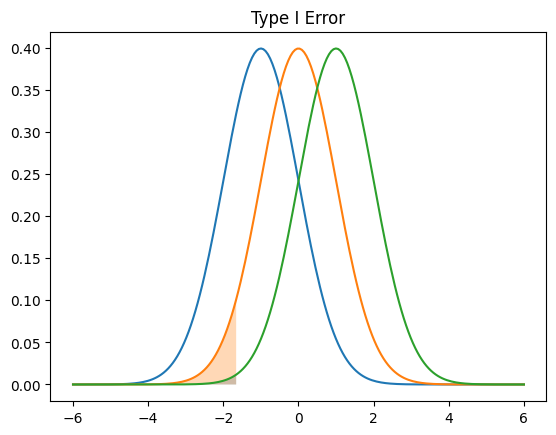

In [9]:
x=np.linspace(-6,6,200)
pdfa=st.norm.pdf(x,-1,1)
pdfb=st.norm.pdf(x,0,1)
pdfc=st.norm.pdf(x,1,1)

plt.plot(x,pdfa,x,pdfb,x,pdfc)

print(st.norm.ppf(0.05))

#画出一类错误
plt.fill_between(x,pdfc,where=x<-1.64,alpha=0.3)
plt.fill_between(x,pdfb,where=x<-1.64,alpha=0.3)
plt.title('Type I Error')

### $\theta \leq \theta_0, \sigma^2$ 已知的检验

$$
C=\theta_0+1.64\sigma/\sqrt{n}
$$

1.644853626951472


Text(0.5, 1.0, 'Type II Error')

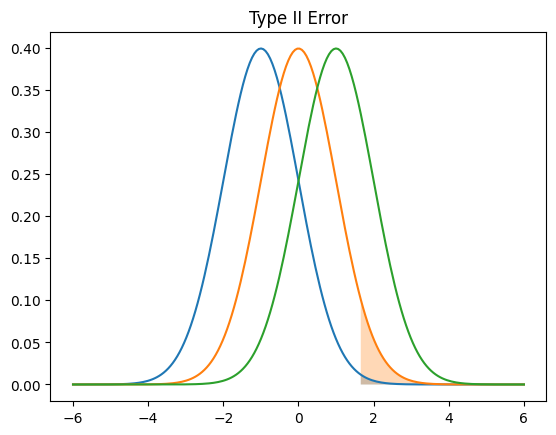

In [10]:
x=np.linspace(-6,6,200)
pdfa=st.norm.pdf(x,-1,1)
pdfb=st.norm.pdf(x,0,1)
pdfc=st.norm.pdf(x,1,1)

plt.plot(x,pdfa,x,pdfb,x,pdfc)

print(st.norm.ppf(0.95))

plt.fill_between(x,pdfa,where=x>1.64,alpha=0.3)
plt.fill_between(x,pdfb,where=x>1.64,alpha=0.3)
plt.title('Type II Error')

### 假设检验的矛盾

当 $\theta_0-1.64\sigma/\sqrt{n} \leq \bar{\theta} \leq \theta_0+1.64\sigma/\sqrt{n}$ 时候，两个假设都成立

- $\theta \ge \theta_0$
- $\theta \le \theta_0$

### $\theta = \theta_0, \sigma^2$已知的检验

- $|\bar{\theta} - \theta_0|\leq C$


-1.9599639845400545


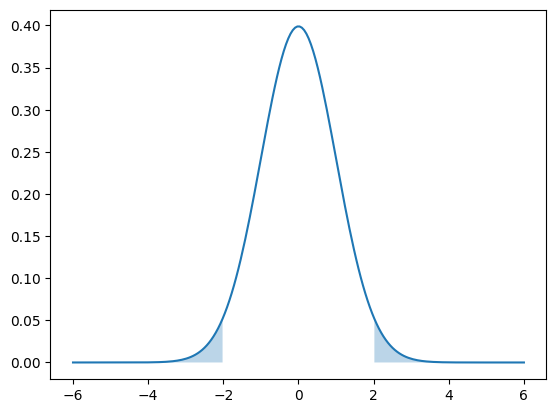

In [ ]:
x=np.linspace(-6,6,200)
pdfb=st.norm.pdf(x,0,1)
plt.plot(x,pdfb)

print(st.norm.ppf(0.025))

plt.fill_between(x,pdfb,where=(x>1.96)|(x<-1.96),alpha=0.3)
plt.title('check')

### $\sigma$ 未知

**假设检验的三种情况**

1. $H_0 : \theta \geq \theta_0$，$H_1 : \theta < \theta_0$
2. $H_0 : \theta \leq \theta_0 $,$H_1 : \theta > \theta_0$
3. $H_0 : \theta = \theta_0$，$H_1 : \theta \neq \theta_0$

$\frac{\bar{\theta} - \theta_0}{S/\sqrt{n}}$ 会近似服从 $t_{n-1}$ 分布。

1. **左侧检验**：$\frac{\bar{\theta} - \theta_0}{S/\sqrt{n}} \geq -t_{n-1}(\alpha)$
2. **右侧检验**：$\frac{\bar{\theta} - \theta_0}{S/\sqrt{n}} \leq t_{n-1}(\alpha)$
3. **双侧检验**：$|\frac{\bar{\theta} - \theta_0}{S/\sqrt{n}}| \leq t_{n-1}(\alpha/2)$


-2.570581835636315


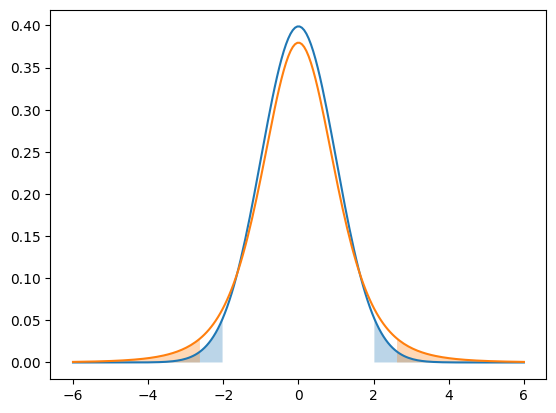

In [ ]:
# 正态与t的区别：t尾部更厚
x=np.linspace(-6,6,200)
pdfb=st.norm.pdf(x,0,1)
t=st.t.pdf(x,5)
print(st.t.ppf(0.025,5))

plt.plot(x,pdfb,x,t)
plt.fill_between(x,pdfb,where=(x>1.96)|(x<-1.96),alpha=0.3)
plt.fill_between(x,t,where=(x>2.57)|(x<-2.57),alpha=0.3)
plt.title('t-distribution vs normal distribution')

### 其他情况

- 两个正态分布的均值之差的检验，利用上节课的$t_{n+m-2}分布来检验

$$
\sqrt\frac{nm(n+m-2)}{n+m}\frac{\bar{x}-\bar{y} - (\mu_1-\mu_2)}{\sqrt{\sum_{i=1}^{n} (x_i-\bar{x})^2 + \sum_{i=1}^{m} (y_i-\bar{y})^2)}} \propto t_{n+m-2}
$$

- 分布的$\sigma^2$与$\sigma^2_0$的比较, 利用$\chi^2$分布来检验

$$
\frac{(n-1)S^2}{\sigma^2} \propto \chi_{n-1}^2
$$


- 指数分布的均值，使用 

$$
2n\lambda\bar{x}\propto \chi_{2n}^2
$$

$$
\bar{x}< C,lambda>\lambda_0
$$


0.5425405697091292 1.5705216422115462 0.4795388696132433 1.708480345141917
1.8431801340425606 0.6367311173068839 2.085336691906785 0.5853154839290432


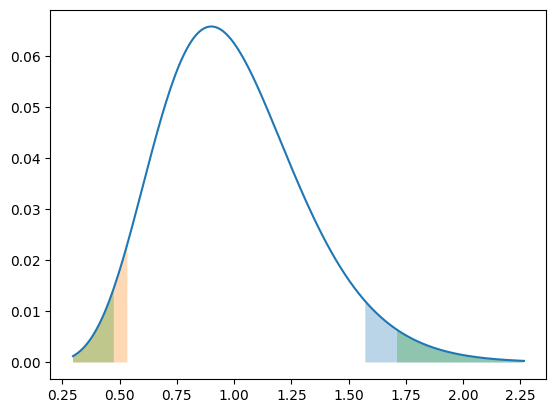

In [ ]:
rv=st.chi2(20)
x=np.linspace(rv.ppf(0.001),rv.ppf(0.999),200)
chi=rv.pdf(x)
l_alpha=rv.ppf(0.05)/20
r_alpha=rv.ppf(0.95)/20
l_alpha_2 = rv.ppf(0.025)/20
r_alpha_2 = rv.ppf(0.975)/20

print(l_alpha,r_alpha,l_alpha_2,r_alpha_2)
print(1/l_alpha,1/r_alpha,1/l_alpha_2,1/r_alpha_2)

plt.plot(x/20,chi)
### x*lambda0<1.57, 1/x>0.64*lambda_0 lambda > lambda_0
plt.fill_between(x/20,chi,where=(x/20>r_alpha),alpha=0.3)
### x*lambda0>0.54, 1/x<1.84*lambda_0 ,lambda < lambda_0
plt.fill_between(x/20,chi,where=(x/20<l_alpha),alpha=0.3)
### 0.47<x*lambda0<1.7, 0.58*lambda_0<1/x<2.08*lambda_0 ,lambda = lambda_0
plt.fill_between(x/20,chi,where=(x/20>r_alpha_2)|(x/20<l_alpha_2),alpha=0.3)

plt.title('chi-square distribution')

## 符号检验


如果想确定地指导假设是否正确（普通的假设检验有可能得到矛盾的结论），需要根据$\theta = \theta_0$的假设决策边界$C_1,C_2$，若$\theta < C_1$，认为A正确；$\theta > C_2$, 结论B正确


### 一个例子
在民意调查中，候选人A和B的得票情况通过以下方式确定：

1. 民意测验n个人，得到人群中选A的人数m，以计算选A的比例p。
2. 根据比例p的值，确定候选人A或B的胜选情况：
   - 如果p > 0.5，候选人A获胜。
   - 如果p < 0.5，候选人B获胜。
   - 如果p = 0.5，不能确定胜选情况。

在之前的计算中，1和2之间存在重合的情况。根据3确定人数m的边界C1, C2

- 当C1 < m < C2时，支持候选人3。
- 当m > C2时，支持候选人1。
- 当m < C1时，支持候选人2。
- m服从二项分布B(n, p)。




4902.0 5098.0
98.0


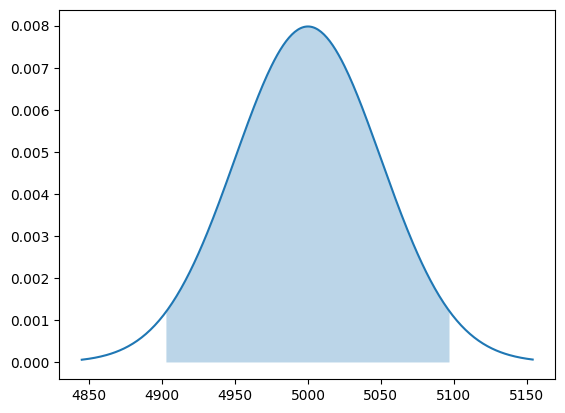

In [ ]:
n=10000
rv=st.binom(n,0.5)
x=np.arange(rv.ppf(0.001),rv.ppf(0.999))
chi=rv.pmf(x)
plt.plot(x,chi)
print(rv.ppf(0.025),rv.ppf(0.975))
plt.fill_between(x,chi,where=(x>rv.ppf(0.025)) & (x<rv.ppf(0.975)),alpha=0.3)
#binominal variance p*(1-p)*N
print(np.sqrt(0.5*0.5*n)*1.96)

plt.title('binominal distribution')

根据结果我们可以发现，比5000人多不到100个人，我们就可以认为A胜出了

而二项分布的方差是$np(1-p)$,人数少的时候，方差更小